**Data Analysis Project: MPG and Model Year in Automobiles**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.animation import PillowWriter
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Importing Data**



<br>
We need to import our dataset, using the correct delimeters and labeling our columns accordingly.

In [3]:
data = pd.read_csv('auto-mpg.data', delimiter='\s+', header=None, names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Name']) # importing our data

df = pd.DataFrame(data) # getting copy of data dataframe

**Exploring Data**


In [4]:
df.shape

(398, 9)

We can see here that our data has 8 columns and 398 rows.

In [5]:
print(df.head())

    MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model Year   
0  18.0          8         307.0      130.0  3504.0          12.0          70  \
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   Origin                       Name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [6]:
print(df.dtypes.to_frame(name='Data Types'))

             Data Types
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Name             object


We can see here that Horsepower appears to be a float when we got the first 5 entries. However checking the data type it is an object.


<br>
Missing values could be causing this discrepancy so it is important to investigate it.

In [7]:
is_clean = df.isnull().sum() # finds any missing values for each column and sums it

print(is_clean) # print results

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Name            0
dtype: int64


We can see that checking for missing values didn't produce any results. This means something else must be causing the data type confusion.


<br>
At this point it would be useful to check all the unique values in Horsepower

In [8]:

print(df['Horsepower'].unique()) # gets all unique values

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


We can see in the midst of these numbers is a '?'. This is likely what the dataset uses for missing values.


<br>
We should replace these '?' with something better.

In [9]:
df = df.replace('?',np.nan) # replaces '?' with NaN

Now that we replaced our off data we can see how many missing values there actually is.

In [10]:
is_clean = df.isnull().sum()

clean_table = is_clean.to_frame(name='Missing Values')

clean_table

,Missing Values
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0
Name,0


We can see that we have 6 missing values in Horsepower. We can either drop the rows containing the missing data or fill it in with an educated number. Since we already have a relatively small dataset and unlikely to use Horsepower at this point, we will fill it in with the mean.

In [11]:
df['Horsepower'] = pd.to_numeric(df['Horsepower']) # turn horsepower into numeric column

horse_mean = df['Horsepower'].mean() # get the mean of the column

df['Horsepower'].fillna(horse_mean, inplace=True) # fill in missing values with mean

df['Horsepower'].isnull().sum() # check if missing values still exist


0

We can see that Horsepower no longer has any missing values.

In [12]:

temp = pd.DataFrame(df.describe())

temp

#file = temp.to_csv('describe.csv')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000



Know that we've explored our data, it's time to take a closer look at our dependent variable (MPG). We have chose this as our dependent variable as we are predicting fuel efficiency over time. That makes MPG a function of Model Year. Model Year also fits as our independent variable because of its discrete natural ordering.

Text(0.5, 1.0, 'Distribution of MPG')

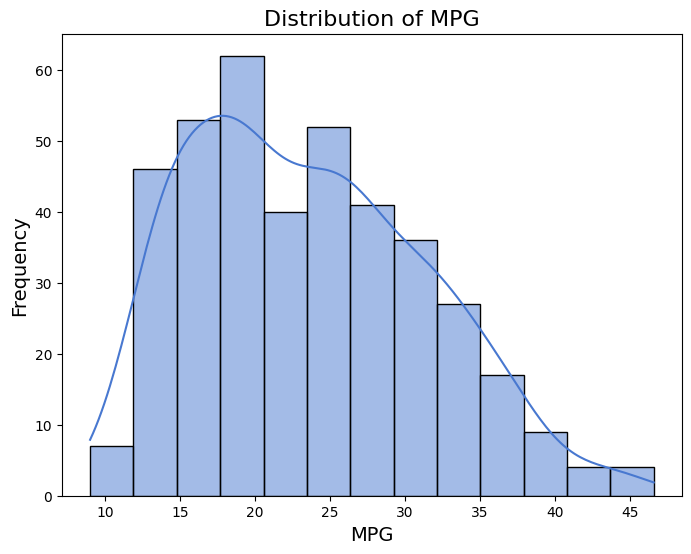

In [13]:
y = df['MPG'] # Define independent variable (MPG)

plt.figure(figsize=(8,6)) # change the size of plot

colors = sns.color_palette('muted') # get muted color pallete

sns.histplot(y,kde=True,color=colors[0]) # graph plot with kde line

plt.xlabel("MPG", fontsize=14) # label x axis
plt.ylabel("Frequency", fontsize=14) # label y axis
plt.title("Distribution of MPG", fontsize=16) # give title

We can see from this visualization that or data is positively skewed and unimodal.

<br>
It would be useful to get a numerical understanding of our skew and find out our kurtosis

In [14]:
print("Skewness: %f" % df['MPG'].skew())
print("Kurtosis: %f" % df['MPG'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


We have a slight positive skew meaning that our data tends to fall slightly above the median. The negative kurtosis indicates that we have few or no extreme outliers.



In [15]:
x=df['Model Year']

print(x.unique())

[70 71 72 73 74 75 76 77 78 79 80 81 82]


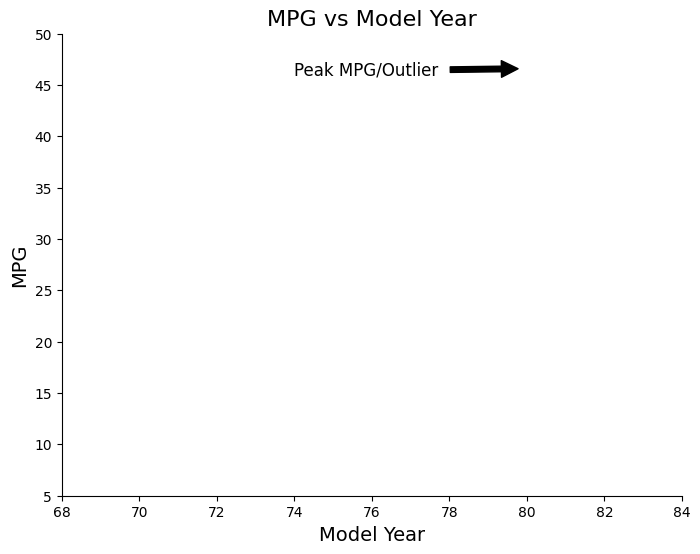

In [16]:
fig = plt.figure(1,figsize=(8,6))

scatter = plt.scatter([],[],c='lightblue',alpha=.8) # empty scatter plot

#plt.xticks([]) #Removes number labels
#plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines (the top and right border of our graph)
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

plt.xlabel('Model Year',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Model Year',fontsize=16) # Gives our plot a title

writer = PillowWriter(fps=2) # Creates our animation object with a slow speed of 2 fps

x_list = [] # define empty x list
y_list = [] # define empty y list

x_set = sorted(set(x)) # find all unique values

"""with writer.saving(fig,'Model_Year_vs_MPG.gif',100): # creates gif file
    for year in x_set: # for every unique year (ordered)

        y_values = df.loc[df['Model Year'] == year, 'MPG'].tolist() # get all the y values corresponding to that year (x)

        x_list.extend([year]*len(y_values)) # add the year (x) to the list for every y value associated with it
        y_list.extend(y_values) # add y values to list

        scatter.set_offsets(np.column_stack((x_list,y_list))) # creates scatterplot with those lists

        writer.grab_frame() # adds this frame to the gif """

plt.annotate('Peak MPG/Outlier', xy=(80, 46.6), xytext=(74, 46), fontsize=12,arrowprops=dict(facecolor='black',shrink=.1)) # adds the Peak MPG arrow

plt.show() # displays graph

We can see in the graph there seems to be a slight positive trend, with no obvious outliers. We will now investigate this further since a visualization can only give us a rough idea of what is going on 

In [17]:
r = x.corr(y,method='pearson') # calculates our correlation using pearson correlation

print(f"The correlation coefficient is {r}")

The correlation coefficient is 0.5792671330833096


In [18]:
Q1 = y.quantile(0.25) # Calculate our quartiles
Q3 = y.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df['MPG'][(y < lower) | (y > upper)].values # search for outliers

print(f"The outliers are {outliers}")

The outliers are [46.6]


Our correlation analysis would also indicate that we have a slight positive correlation. We also checked for outliers which resulted in one small outliers which shouldn't affect our analysis. 



<br>
We are now going to implement a Simple Linear Regression because we are predicting a relationship between two variables, therefore being the most appropriate. This will give us further insight to the relation between our variables and help us identify any issues with our data.

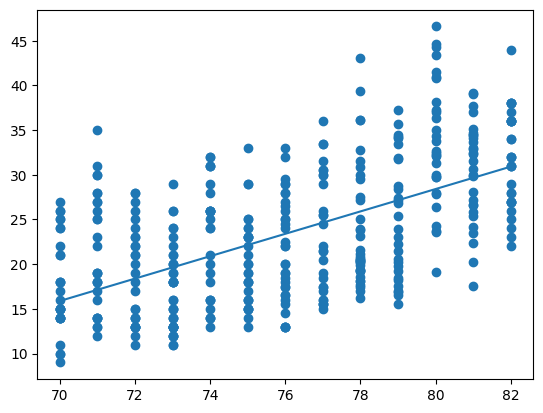

In [19]:
x_arr = np.array(x)
y_arr = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(x_arr,y_arr,test_size=.3)

lm = LinearRegression() # creating object

lm.fit(X_train.reshape(-1,1),y_train) # fit our data

pred_y = lm.predict(x_arr.reshape(-1,1)) # makes a y prediction for every x value

plt.scatter(x,y)
plt.plot(x,pred_y)


We now are using our graph from before and adding a linear regression line using our predicted y values. This provides a great medium for us to see our predicted values.

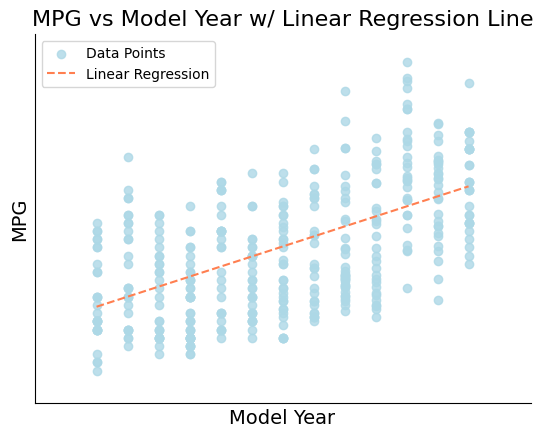

In [89]:

scatter = plt.scatter([],[],c='lightblue',alpha=.8,label='Data Points')

linReg, = plt.plot([],[],c='coral',label='Linear Regression',linestyle='--')

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

plt.xlabel('Model Year',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Model Year w/ Linear Regression Line',fontsize=16) # gives a plot title

plt.legend()

writer = PillowWriter(fps=200)

x_list = []
y_list = []
z_list = []

with writer.saving(fig,'Model_Year_vs_MPG_LinReg.gif',100):
    for i in range(len(x)): 

        x_list.append(x[i])
        y_list.append(y[i])

        x_arr = np.array(x_list)
        y_arr = np.array(y_list)

        if i > 1:
            X_train, X_test, y_train, y_test = train_test_split(x_arr,y_arr,test_size=.3)

            lm.fit(X_train.reshape(-1,1),y_train)
        else:
            X_train = 0

        predict_y = lm.predict(x_arr.reshape(-1,1))

        scatter.set_offsets(np.column_stack((x_list,y_list)))
        linReg.set_data(x_list,predict_y)

        writer.grab_frame()

plt.show()

This graph provides a great visual for seeing our predicted values versus our actual values. However there is obviously a lot of variability in this graph. It would be beneficial to use a more robust regression analysis.




<br>
Considering all of this variability with our Simple Linear Regression, we should find a model that fits our data better. A good fit would be a Multiple Linear Regression as it is just a slight step up. 
<br>

For this model we want to add a feature, however this feature needs to follow two conditions:<br>
    &emsp; 1. It should have a strong correlation with MPG<br>
    &emsp; 2. It shouldn't be linearly correlated with Model Year 


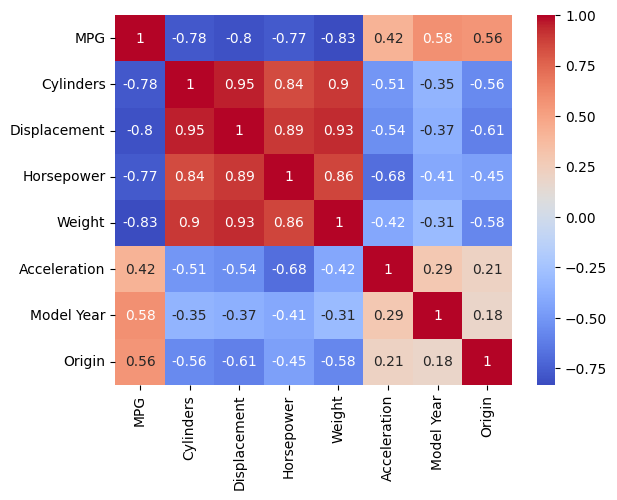

In [90]:
numerical_data = df.drop('Name',axis=1)

r_matrix = numerical_data.corr()

sns.heatmap(r_matrix,annot=True,cmap='coolwarm')

plt.show()

From this heatmap we can see which variables are strongly correlated with MPG. We can see that {Cylinders, Displacement, Horsepower and Weight} are potential candidates.


<br>
Since they satisfy (1.), We know need to check if they satisfy (2.). We can do this by checking for multicollinearity, which is evaluted using a metric called VIF. We are looking at the lowest values as they indicate less multicollinearity. The VIF can be analyzed as 1 : not correlated, 1-5 : moderately correlated and 5+ : highly correlated. Ideally we will find a value close to 1.

In [91]:
X_var = [df[['Model Year','Weight']],df[['Model Year','Cylinders']],df[['Model Year','Horsepower']],df[['Model Year','Displacement']]] # get all of our correlated variables

vif_data = {} # get empty list

for X_vars in X_var: # for each of the correlated variables
    value = [variance_inflation_factor(X_vars.values, i) for i in range(len(X_vars.columns))]
    vif_data[tuple(X_vars.columns)] = value # add the name of the variables


vif_data=pd.DataFrame(vif_data) # turn into Data Frame
vif_data = vif_data.drop(index=vif_data.index[1])

vif_data # print table

Model Year                                  
      Weight Cylinders Horsepower Displacement
0  11.767195  9.985874   7.543748     4.141533

From this table we can see that Displacement has the lowest VIF score which is our best candidate for a Multiple Linear Regression.


<br>
We already know that Displacement and MPG have a strong correlation from our Correlation Matrix Heatmap. However, it is still useful to visualize it so we can see any possible outliers and analzye our curve type.

Text(0.5, 1.0, 'MPG vs Displacement')

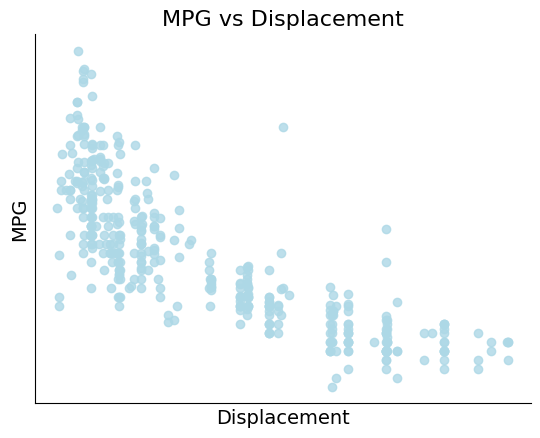

In [92]:
displacement = df['Displacement'] # get displacement column

plt.scatter(displacement,y,c='lightblue',alpha=.8)

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Displacement',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Displacement',fontsize=16) # Give our plot a title


With this visualization we see that there seems to be a strong negative correlation, possibly exponential decay, between MPG and Weight. We can also see some possible outliers. We will repeat our previous analysis and check more concretely for outliers and understand our correlation.

In [93]:
Q1 = displacement.quantile(0.25) # Calculate our quartiles
Q3 = displacement.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df['Displacement'][(displacement < lower) | (displacement > upper)].values # search for outliers

print(f"The outliers are {outliers}")

The outliers are []


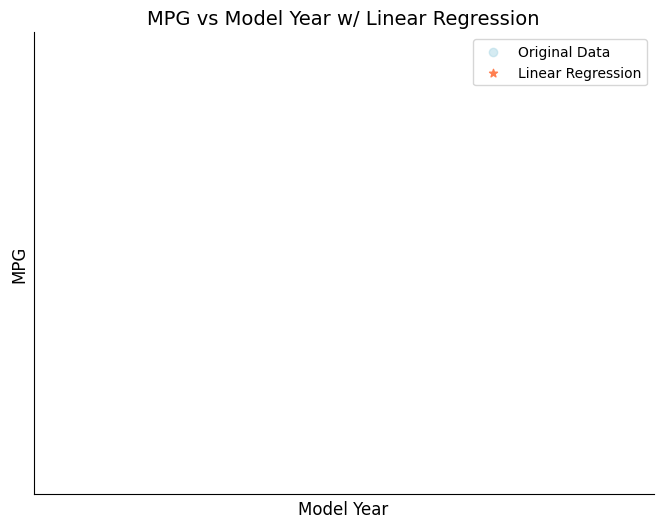

In [94]:
multiple_x = df[['Model Year', 'Displacement']].values # creating an x intercept with Model Year and Weight

multiLM = LinearRegression() # Creating LinearRegression instance

multiLM.fit(multiple_x,y) # Fitting our x and y

multiPred_y = multiLM.predict(multiple_x) # getting our prediction array

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(0,50)

plt.xlabel('Model Year',fontsize=12) # Gives our axes a label
plt.ylabel('MPG',fontsize=12)

plt.title('MPG vs Model Year w/ Linear Regression',fontsize=14) # gives a plot title

scatter = plt.scatter([], [], c='lightblue', alpha=.5, label='Original Data') # plot original data
linReg = plt.scatter([],[],c='coral', alpha=1.0, label='Linear Regression',marker='*') # plot linear regression line

x_list = x.tolist()
y_list = y.tolist()
z_list = []

writer= PillowWriter(fps=500)

"""with writer.saving(fig,'Model_Year_vs_MPG_MultiLinReg.gif',100):
    for i in x:
        x_list.pop()
        y_list.pop()

        scatter.set_offsets(np.column_stack((x_list,y_list)))
        if(len(x_list) % 5 == 0):
            writer.grab_frame()

    for i in range(len(x)):
        x_list.append(x[i])
        y_list.append(multiPred_y[i])
        
        linReg.set_offsets(np.column_stack((x_list,y_list)))
        if(i % 5 == 0):
            writer.grab_frame()

    for t in range(1000):
        scatter.set_offsets(np.column_stack((x,y)))
        linReg.set_offsets(np.column_stack((fitted_X,multiPred_y)))
        writer.grab_frame() """


plt.legend() # add legend
plt.grid() # add grid

plt.show()

From this data visualization we can obviously tell this fits the data much better than our Simple Linear Regression. We will now calculate the variation between the two too get an understanding of the magnitude. We will use R^2 score because it is a better for comparing correlation between two different things. This is because the score is more intituitive then the regular R score.

In [95]:


r2 = r2_score(y,pred_y) # r2 score for our simple linear regression
print(f"The R^2 score for our Simple Linear Regression {r2}")

multi_r2 = r2_score(y,multiPred_y) # r2 score for our multiple linear regression
print(f"The R^2 score for our Multiple Linear Regression {multi_r2}")

r2_Improvement = (multi_r2 / r2) * 100
print(f"The Multiple Linear Regression explains our variation more by a magnitude of {r2_Improvement}%")



The R^2 score for our Simple Linear Regression 0.3352012205011554
The R^2 score for our Multiple Linear Regression 0.7386185579588377
The Multiple Linear Regression explains our variation more by a magnitude of 220.35079611420798%
